# Todo:
1. the name "source" may need to be changed to "depart city"
2. 

# what have been done
1. visualized the data
       a. price gap b/w diff classes 

# Airfare ML : Predicting Flight Fares

## Introduction

In an era where travel has become not just a luxury but a necessity, the dynamics of air travel have evolved drastically. With this evolution comes the complexity of airfare pricing, a crucial factor influencing consumer decisions and airline profitability. This project, centered on developing a machine learning model to predict flight fares – Airfare ML – is born out of the need to bring more transparency and predictability to airfare pricing.

### Why This Topic?

Consumer Empowerment: In a consumer-driven market, providing accurate predictions of flight fares empowers travelers to make informed decisions. This project aims to demystify airfare pricing, enabling consumers to plan and budget their travels more effectively.

Dynamic Pricing Challenges: The airline industry is notorious for its dynamic and sometimes opaque pricing strategies. Understanding and predicting these price fluctuations are not just beneficial but essential for anyone involved in the travel industry, from individual travelers to large travel agencies.

Technological Advancement: The advent of big data and machine learning offers unprecedented opportunities to tackle complex problems like airfare prediction. This project is an exploration into harnessing these technologies to offer real-world solutions.

### Importance of Predicting this Model
Strategic Planning for Airlines: By accurately predicting flight fares, airlines can optimize their revenue management and pricing strategies. This leads to more efficient operations and potentially higher profits.

Market Competitiveness: For travel agencies and booking platforms, providing customers with the most economical options can be a significant competitive edge. This project aims to equip these entities with the tools to offer better deals.

Economic Insights: Flight fare trends can reflect broader economic patterns. Predicting these fares contributes to understanding economic factors like demand and supply dynamics, consumer spending power, and even the impact of global events.

Customization and Personalization: In the long term, this project can pave the way for more personalized travel experiences, where predictions can be tailored to individual preferences and historical data.

### Dataset Details
The dataset contains the following details:
- Total Rows: 452,088
- Total Columns: 13

Column Descriptions:
1. Date_of_journey: The date on which the flight is scheduled to depart is stored in this column.
2. Journey_day: The day of the week on which the flight is scheduled to depart whichis derived from date of journey.
3. Airline: The name of the airline company is stored in the airline column.
4. Flight_code: Flight stores information regarding the plane's flight code.
5. Class: A categorical feature that contains information of flight seat class.
6. Source: City from which the flight takes off.
7. Departure: This is a derived categorical feature obtained created by grouping time periods into bins.
8. Total_stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
9. Arrival: This is a derived categorical feature created by grouping time intervals into bins.
10. Destination: City where the flight will land.
11. Duration_in_hours: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
12. Days_left: This is a derived characteristic that is calculated by subtracting the date of journey from the booking date.
13. Fare: This is a target variable stores the price of the flight ticket in the (INR), including all taxes.

#Imports

### Import Packages

In [2]:
# Basic Data Handling and Operations
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Machine Learning Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Evaluation and Hyperparameter Tuning
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

# Miscellaneous Utilities
import warnings
warnings.filterwarnings('ignore')  # To ignore warnings that are not critical

# Setting a seed for reproducibility (optional)
np.random.seed(42)


### Load Dataset

In [3]:
# Import necessary libraries (like Pandas in Python).
# Use a function like pandas.read_csv() to load the data into a DataFrame.
# View the first few rows of the dataset with data.head() to get an initial understanding.

In [4]:
file_path = 'Scraped_dataset.csv'
df = pd.read_csv(file_path)
df.head()

,Date of Booking,Date of Journey,Airline-Class,Departure Time,Arrival Time,Duration,Total Stops,Price
0,15/01/2023,16/01/2023,SpiceJet \nSG-8169\nECONOMY,20:00\nDelhi,22:05\nMumbai,02h 05m,non-stop,"5,335"
1,15/01/2023,16/01/2023,Indigo \n6E-2519\nECONOMY,23:00\nDelhi,01:20\nMumbai,02h 20m,non-stop,"5,899"
2,15/01/2023,16/01/2023,GO FIRST \nG8- 354\nECONOMY,22:30\nDelhi,00:40\nMumbai,02h 10m,non-stop,"5,801"
3,15/01/2023,16/01/2023,SpiceJet \nSG-8709\nECONOMY,18:50\nDelhi,20:55\nMumbai,02h 05m,non-stop,"5,794"
4,15/01/2023,16/01/2023,Air India \nAI-805\nECONOMY,20:00\nDelhi,22:10\nMumbai,02h 10m,non-stop,"5,955"


# Preprocess Dataset

In [5]:
# Splitting columns and renaming them
df[["Airline", "Flight_Code", "Class"]] = df.pop("Airline-Class").str.split('\n', expand=True)
df[["Departure", "Source"]] = df.pop("Departure Time").str.split('\n', expand=True)
df[["Arrival", "Destination"]] = df.pop("Arrival Time").str.split('\n', expand=True)

# Handling date-time conversions and feature creation in one step
df["Date of Booking"] = pd.to_datetime(df["Date of Booking"], format="%d/%m/%Y")
df["Date of Journey"] = pd.to_datetime(df["Date of Journey"], format="%d/%m/%Y")
df["Days_left"] = (df["Date of Journey"] - df["Date of Booking"]).dt.days

# e.g. 2023-03-15 becomes "Wednesday"
df["Journey_day"] = df["Date of Journey"].dt.day_name()

# Simplifying the time to part of the day transformation
time_to_part = lambda time: (
    "Early Morning" if 0 <= time < 5 else
    "Morning" if 5 <= time < 12 else
    "Afternoon" if 12 <= time < 16 else
    "Evening" if 16 <= time < 19 else
    "Night" if 19 <= time < 22 else
    "Late Night"
)

df["Dep"] = pd.to_datetime(df.pop('Departure'), format='%H:%M').dt.hour.apply(time_to_part)
df["Arr"] = pd.to_datetime(df.pop('Arrival'), format='%H:%M').dt.hour.apply(time_to_part)

# Creating 'Route' column and processing 'Price'
df["Route"] = df["Source"] + "-->" + df["Destination"]
df["Price"] = pd.to_numeric(df["Price"].str.replace(',', ''))
df["Price"] = df["Price"] * 0.012

# Handling the duration in hours
df["Duration_in_hrs"] = df["Duration"].str.replace(r'(\d+)h (\d+)m', lambda x: str(int(x.group(1)) + int(x.group(2))/60), regex=True).astype(float)

# Handling Total Stops
df["Total Stops"].value_counts()
df['Total Stops'] = df['Total Stops'].apply(lambda x: 'non-stop' if 'non-stop' in x
                                                         else '1-stop' if '1-stop' in x
                                                         else '2+-stop' if '2+-stop' in x
                                                         else x)

# Dropping unnecessary columns
df.drop(["Date of Booking", "Duration"], axis=1, inplace=True)

df.head(3)

,Date of Journey,Total Stops,Price,Airline,Flight_Code,Class,Source,Destination,Days_left,Journey_day,Dep,Arr,Route,Duration_in_hrs
0,2023-01-16,non-stop,64.020,SpiceJet,SG-8169,ECONOMY,Delhi,Mumbai,1,Monday,Night,Late Night,Delhi-->Mumbai,2.083333
1,2023-01-16,non-stop,70.788,Indigo,6E-2519,ECONOMY,Delhi,Mumbai,1,Monday,Late Night,Early Morning,Delhi-->Mumbai,2.333333
2,2023-01-16,non-stop,69.612,GO FIRST,G8- 354,ECONOMY,Delhi,Mumbai,1,Monday,Late Night,Early Morning,Delhi-->Mumbai,2.166667


# Visualize the Dataset

## 1. Price gap between different classes
The chart below highlights a significant price disparity between Business and Economy classes, with Business class tickets being markedly more expensive. The chart also shows a calculated ratio, emphasizing that on average, Business class tickets are several times costlier than those in Economy class. 

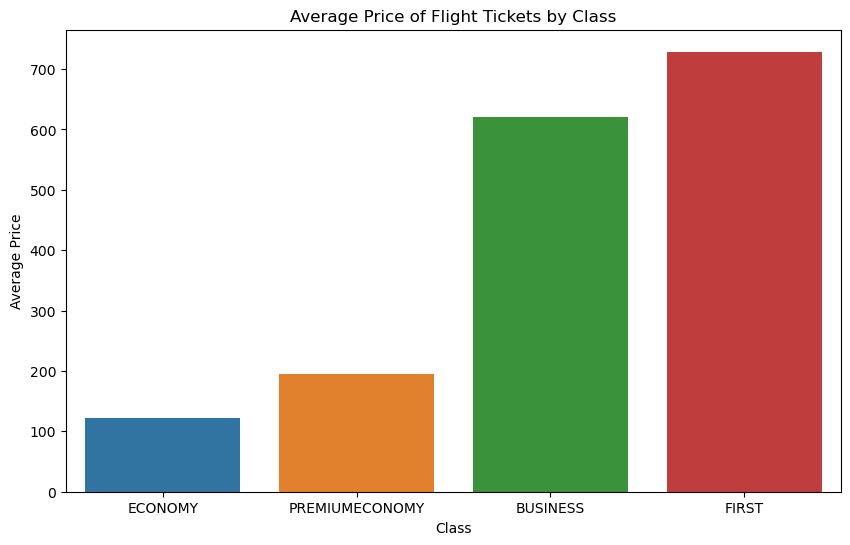

In [8]:
# Grouping by 'Class' and calculating average price
avg_price_per_class = df.groupby('Class')['Price'].mean()

# Calculating the ratio of average prices (Business to Economy)
business_price = avg_price_per_class.get('Business', None)
economy_price = avg_price_per_class.get('Economy', None)
if business_price is not None and economy_price is not None and economy_price != 0:
    price_ratio = business_price / economy_price
else:
    price_ratio = None

# Re-arranging the bar chart based on average price, with the lowest average (economy) on the leftmost
sorted_avg_price_per_class = avg_price_per_class.sort_values()

# Plotting the re-arranged bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_avg_price_per_class.index, y=sorted_avg_price_per_class.values)
plt.title(f"Average Price of Flight Tickets by Class" + 
          (f"\nBusiness is {price_ratio:.2f} times more expensive than Economy" if price_ratio else ""))
plt.xlabel('Class')
plt.ylabel('Average Price')
plt.show()

### Basic Info

In [8]:
# Summary of data types and values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452088 entries, 0 to 452087
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Date of Journey  452088 non-null  datetime64[ns]
 1   Total Stops      452088 non-null  object        
 2   Price            452088 non-null  float64       
 3   Airline          452088 non-null  object        
 4   Flight_Code      452088 non-null  object        
 5   Class            452088 non-null  object        
 6   Source           452088 non-null  object        
 7   Destination      452088 non-null  object        
 8   Days_left        452088 non-null  int64         
 9   Journey_day      452088 non-null  object        
 10  Dep              452088 non-null  object        
 11  Arr              452088 non-null  object        
 12  Route            452088 non-null  object        
 13  Duration_in_hrs  452088 non-null  float64       
dtypes: datetime64[ns](1)

### Descriptive Statistics

In [ ]:
# Summary statistics for numerical columns
df.describe()

,Price,Days_left,Duration_in_hrs
count,452088.000000,452088.000000,452088.000000
mean,22840.100890,25.627902,12.349222
std,20307.963002,14.300846,7.431478
min,1307.000000,1.000000,0.750000
25%,8762.750000,13.000000,6.583333
50%,13407.000000,26.000000,11.333333
75%,35587.000000,38.000000,16.500000
max,143019.000000,50.000000,43.583333


### Check for Missing Values

In [ ]:
# Use data.isnull().sum() to identify columns with missing values.
# Decide on strategies for handling missing data (imputation, removal, etc.).

In [ ]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percentage})
print("Missing Values in Each Column:")
print(missing_info)

Missing Values in Each Column:
                 Count  Percentage
Date of Journey      0         0.0
Total Stops          0         0.0
Price                0         0.0
Airline              0         0.0
Flight_Code          0         0.0
Class                0         0.0
Source               0         0.0
Destination          0         0.0
Days_left            0         0.0
Journey_day          0         0.0
Dep                  0         0.0
Arr                  0         0.0
Route                0         0.0
Duration_in_hrs      0         0.0


Since the percentage for all values are 0, it means that there's no missing values.

### Check for Duplicates

In [ ]:
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 6722


This indicates that there are 6722 duplicate rows. These rows are not neccessary for further evaluation, so we need to remove them.

In [ ]:
df = df.drop_duplicates()
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


Now the number of duplicate rows are 0, we can proceed with further investigation.

### Identify Outliers

In [ ]:
# Visualize data using plots (box plots, histograms) to spot outliers.
# Decide on a method to handle outliers (removal, transformation, or keeping them if they are relevant).

First, Let's look at details for the three numerical values: Price, Days_left and Duration_in_hrs

In [ ]:
numerical_columns = df.select_dtypes(include=['number'])
numerical_description = numerical_columns.describe()
print(numerical_description)

               Price      Days_left  Duration_in_hrs
count  445366.000000  445366.000000    445366.000000
mean    22919.747165      25.617822        12.182491
std     20394.214040      14.302610         7.299361
min      1307.000000       1.000000         0.750000
25%      8712.000000      13.000000         6.500000
50%     13362.000000      26.000000        11.250000
75%     36980.000000      38.000000        16.333333
max    143019.000000      50.000000        43.583333


Then, Let's create box plots for all the numerical features

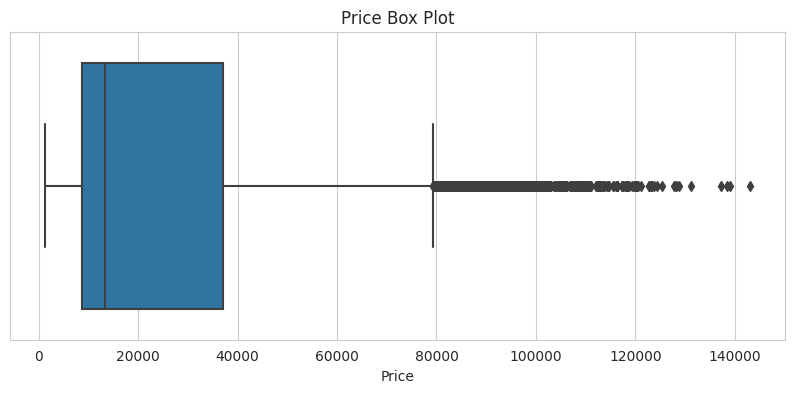

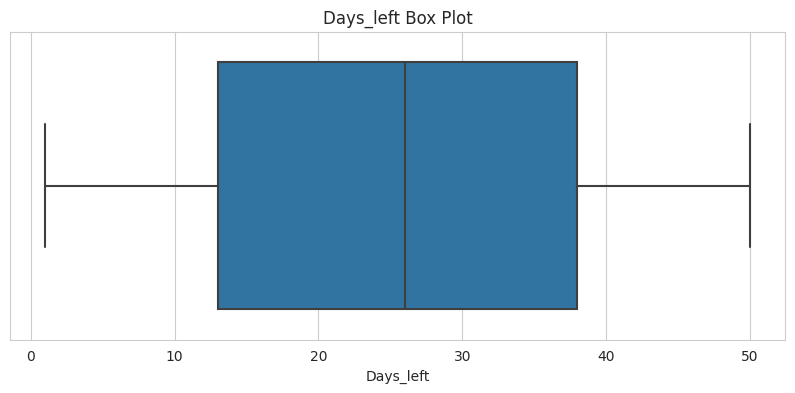

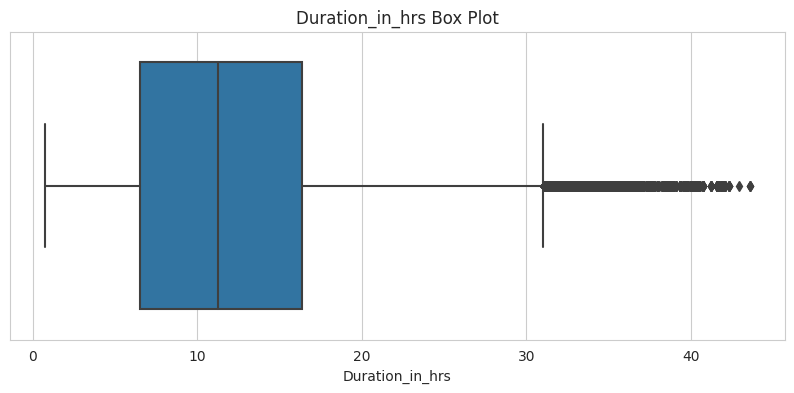

In [ ]:
# Visualize outliers using box plots
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'{column} Box Plot')
    plt.show()

Outliers for price and duration_in_hrs are relatively larger. Let's look at this using histogram.

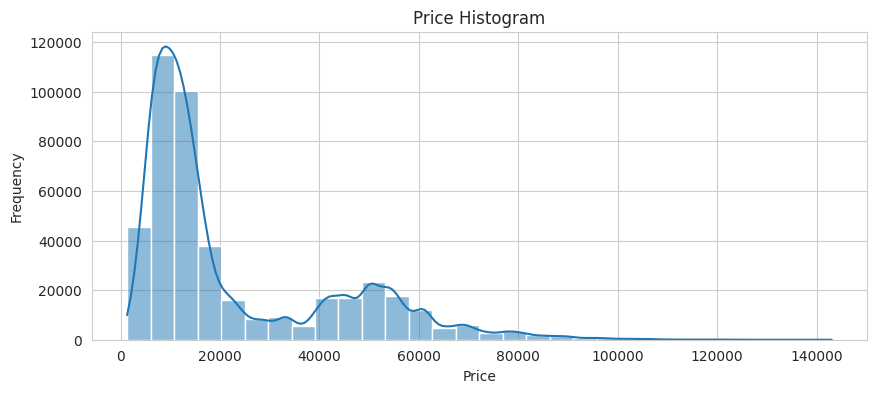

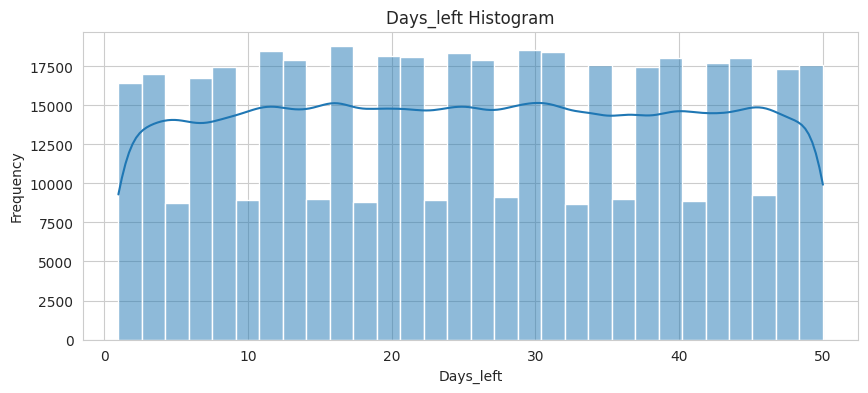

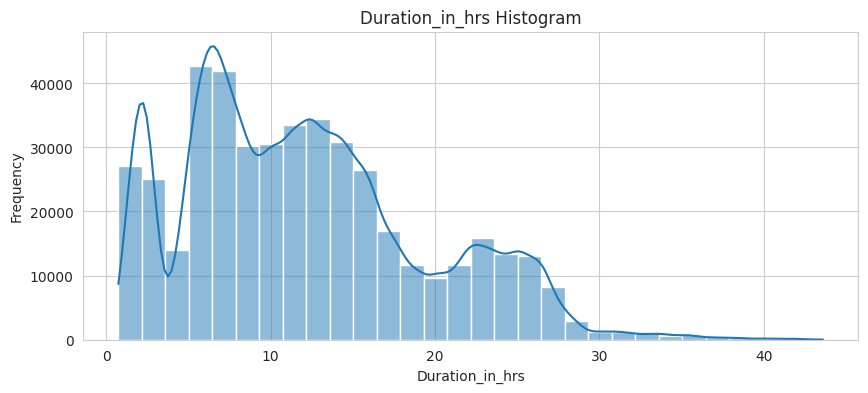

In [ ]:
sns.set_style("whitegrid")

# Select only the numerical columns from the DataFrame
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Plotting histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True, bins=30)  # KDE plot overlayed on histogram
    plt.title(f'{column} Histogram')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Pricing in datasets often exhibits high outliers due to a variety of market-driven and situational factors. Prices can vary greatly depending on factors like demand, seasonality, brand value, special features, or luxury status.

However, Duration_in_hrs has different situation. We need to see this in a more detailed way.

In [ ]:
duration_stats = df.groupby(['Route', 'Class', 'Total Stops'])['Duration_in_hrs'].agg(['min', 'max'])

# Resetting index for better readability
duration_stats.reset_index(inplace=True)

# Displaying the table
print(duration_stats)

                     Route           Class Total Stops        min        max
0    Ahmedabad-->Bangalore        BUSINESS      1-stop   3.666667  29.750000
1    Ahmedabad-->Bangalore        BUSINESS     2+-stop  13.416667  13.416667
2    Ahmedabad-->Bangalore         ECONOMY      1-stop   3.666667  42.083333
3    Ahmedabad-->Bangalore         ECONOMY     2+-stop   7.250000  28.333333
4    Ahmedabad-->Bangalore         ECONOMY    non-stop   2.000000   2.500000
..                     ...             ...         ...        ...        ...
315       Mumbai-->Kolkata         ECONOMY     2+-stop   5.500000  35.916667
316       Mumbai-->Kolkata         ECONOMY    non-stop   2.333333   3.083333
317       Mumbai-->Kolkata  PREMIUMECONOMY      1-stop   4.750000  27.583333
318       Mumbai-->Kolkata  PREMIUMECONOMY     2+-stop   7.583333  40.333333
319       Mumbai-->Kolkata  PREMIUMECONOMY    non-stop   2.750000   2.750000

[320 rows x 5 columns]


As we can see above, for the same route, same class, same total stops, there is a huge difference in min and max duration in hours, which does not make sense at all. So it will be reasonable for us to remove the outliers. Here's how it looks like to remove 75% of the outliers:

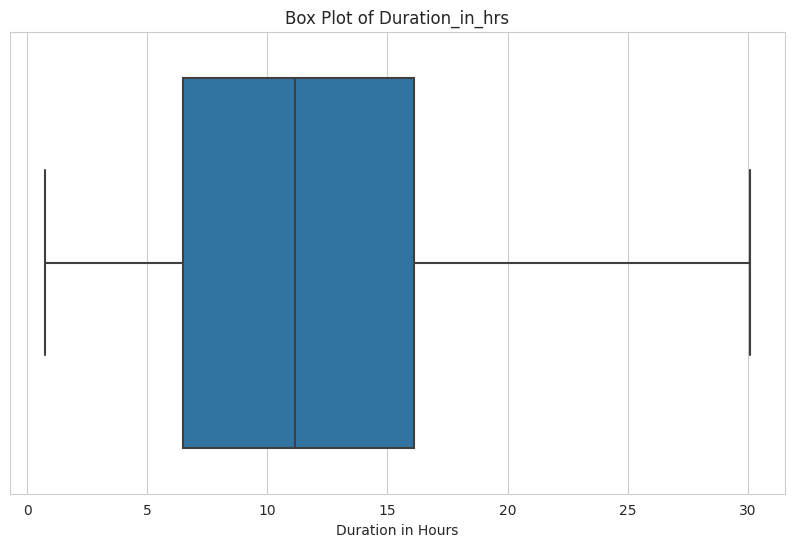

In [ ]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Duration_in_hrs'].quantile(0.25)
Q3 = df['Duration_in_hrs'].quantile(0.75)

# Calculate Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower limits to filter out outliers
upper_limit = Q3 + 1.4 * IQR
lower_limit = Q1 - 1.4 * IQR

# Filter the dataset to remove data points outside the upper and lower limits
df = df[(df['Duration_in_hrs'] <= upper_limit) & (df['Duration_in_hrs'] >= lower_limit)]

# Create box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Duration_in_hrs'])
plt.title('Box Plot of Duration_in_hrs')
plt.xlabel('Duration in Hours')
plt.show()

Now we have removed the outlier for Duration_in_hrs

## 3. Data Analysis

### Numerical Values Analysis
**Todo change box and line graph**



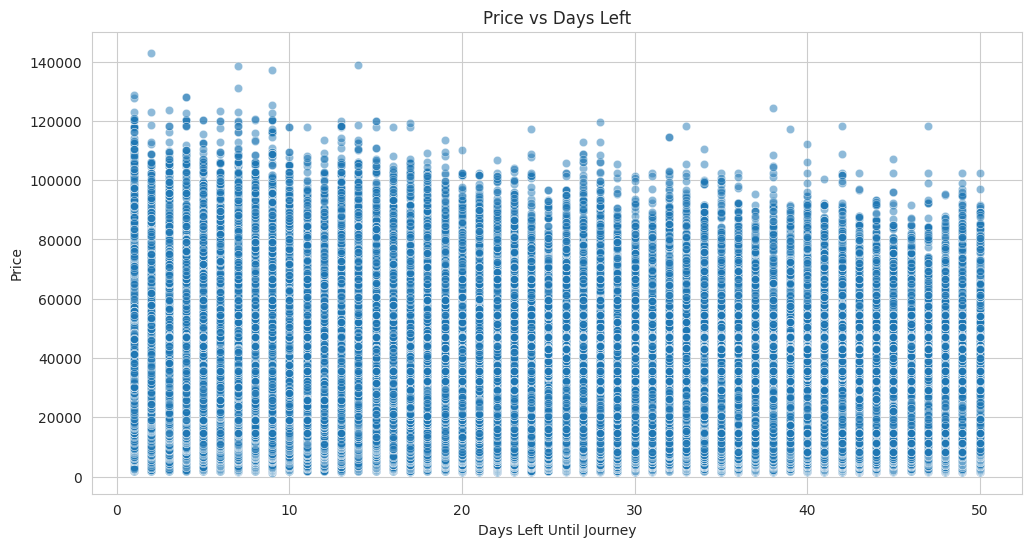

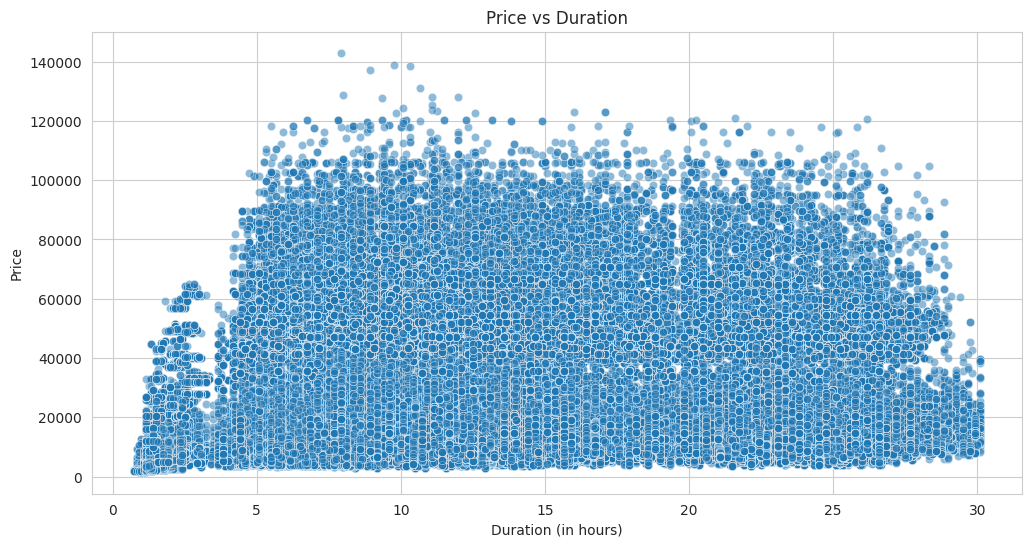

In [ ]:
# Scatter plot for Price vs Days Left
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Days_left', y='Price', alpha=0.5)
plt.title('Price vs Days Left')
plt.xlabel('Days Left Until Journey')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# Scatter plot for Price vs Duration (in years)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Duration_in_hrs', y='Price', alpha=0.5)
plt.title('Price vs Duration')
plt.xlabel('Duration (in hours)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

# TODO


### Class Pricing

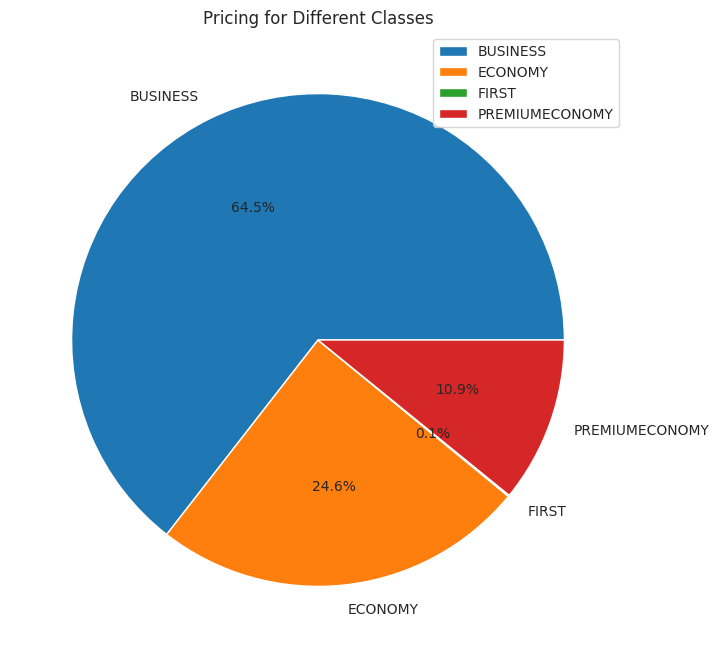

In [ ]:
# Group the data by 'Class' and sum up the prices
price_by_class = df.groupby('Class')['Price'].sum()

# Generate a pie chart
plt.figure(figsize=(8, 8))
plt.pie(price_by_class, labels=price_by_class.index, autopct='%1.1f%%')
plt.title('Pricing for Different Classes')
plt.legend()
plt.show()

The pie chart depicts the distribution of total pricing across different travel classes. From the chart, it's clear that the 'Economy' class accounts for the majority of the revenue, comprising 64.5% of the total pricing. This suggests that the 'Economy' class is likely the most popular or has a higher volume of sales compared to other classes. The 'Business' class follows with 24.6%, which is a significant portion but substantially less than 'Economy', indicating that while business class fares are typically higher, fewer tickets may be sold in this category, or the price difference compensates for the lower volume. The 'First' class has a smaller slice of 10.8%, which might reflect its premium pricing and exclusivity, leading to lower sales volume but potentially high per-ticket revenue. Notably, 'Premium Economy' barely registers at 0.1%, suggesting it is either a new offering with limited uptake or not widely available or chosen by customers

### Demand Analysis

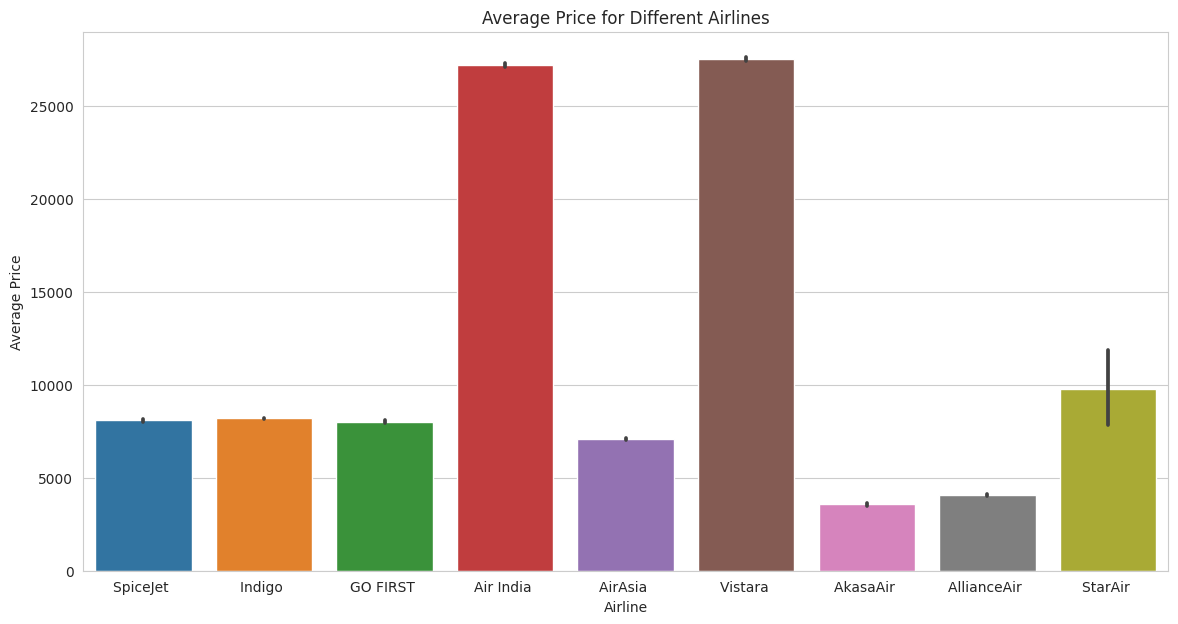

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Airline', y='Price', data=df)
plt.title('Average Price for Different Airlines')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

The bar chart presents a comparison of average ticket prices across various airlines, indicating a diverse pricing strategy in the aviation market. GO FIRST stands out with the highest average price, suggesting a premium pricing model, whereas Vistara closely follows, which could imply a similar market positioning. In contrast, AkasaAir shows the lowest average price, hinting at a budget-friendly approach. StarAir illustrates a significant price variability as denoted by the large error bar, this variability might reflect a broad service offering, ranging from basic economy to higher-end options.

### Geographic Analysis:

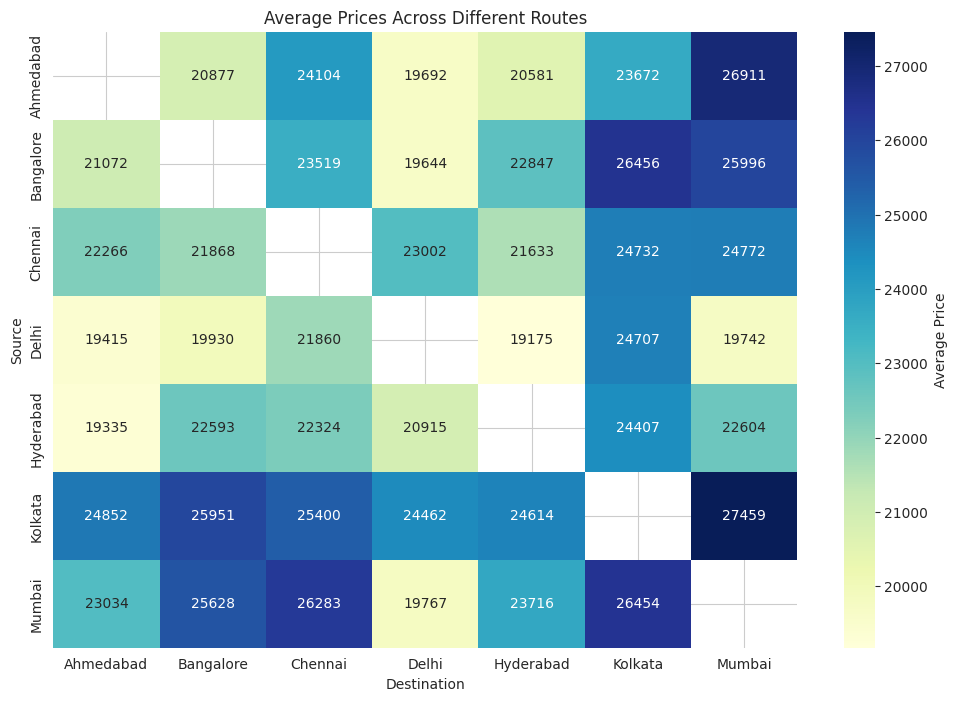

Most Expensive Route:
Source                  Kolkata
Destination              Mumbai
Price              27459.112701
Duration_in_hrs       12.110783
Name: 35, dtype: object

Least Expensive Route:
Source                    Delhi
Destination           Hyderabad
Price              19174.685664
Duration_in_hrs       11.696943
Name: 21, dtype: object


In [ ]:
# Group by 'Source' and 'Destination' and calculate average price and duration
route_summary = df.groupby(['Source', 'Destination']).agg({
    'Price': 'mean',
    'Duration_in_hrs': 'mean'
}).reset_index()

# Pivot the table to create a heatmap for average prices
heatmap_data_price = route_summary.pivot_table(index='Source', columns='Destination', values='Price', aggfunc='mean')

# Create a heatmap for average prices
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_price, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Average Price'})
plt.title('Average Prices Across Different Routes')
plt.xlabel('Destination')
plt.ylabel('Source')
plt.show()

# Identify the most and least expensive routes
most_expensive_route = route_summary.loc[route_summary['Price'].idxmax()]
least_expensive_route = route_summary.loc[route_summary['Price'].idxmin()]

print("Most Expensive Route:")
print(most_expensive_route)
print("\nLeast Expensive Route:")
print(least_expensive_route)

#Todo analysis


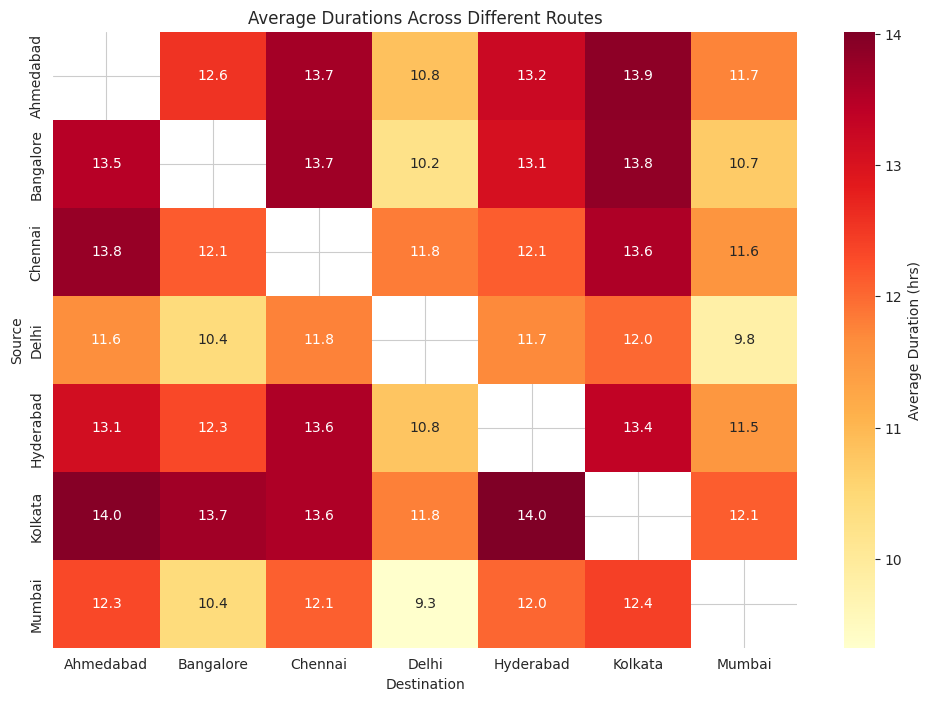


Shortest Route in Terms of Duration:
Source                   Mumbai
Destination               Delhi
Price              19766.967205
Duration_in_hrs        9.322336
Name: 39, dtype: object

Longest Route in Terms of Duration:
Source                 Kolkata
Destination          Hyderabad
Price              24613.65686
Duration_in_hrs      14.016493
Name: 34, dtype: object


In [ ]:
# Pivot the table to create a heatmap for average durations
heatmap_data_duration = route_summary.pivot_table(index='Source', columns='Destination', values='Duration_in_hrs', aggfunc='mean')

# Create a heatmap for average durations
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_duration, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Average Duration (hrs)'})
plt.title('Average Durations Across Different Routes')
plt.xlabel('Destination')
plt.ylabel('Source')
plt.show()

# Identify the shortest and longest routes in terms of duration
shortest_route = route_summary.loc[route_summary['Duration_in_hrs'].idxmin()]
longest_route = route_summary.loc[route_summary['Duration_in_hrs'].idxmax()]

print("\nShortest Route in Terms of Duration:")
print(shortest_route)
print("\nLongest Route in Terms of Duration:")
print(longest_route)


# TOdo analysis

### Time-Based Trends:

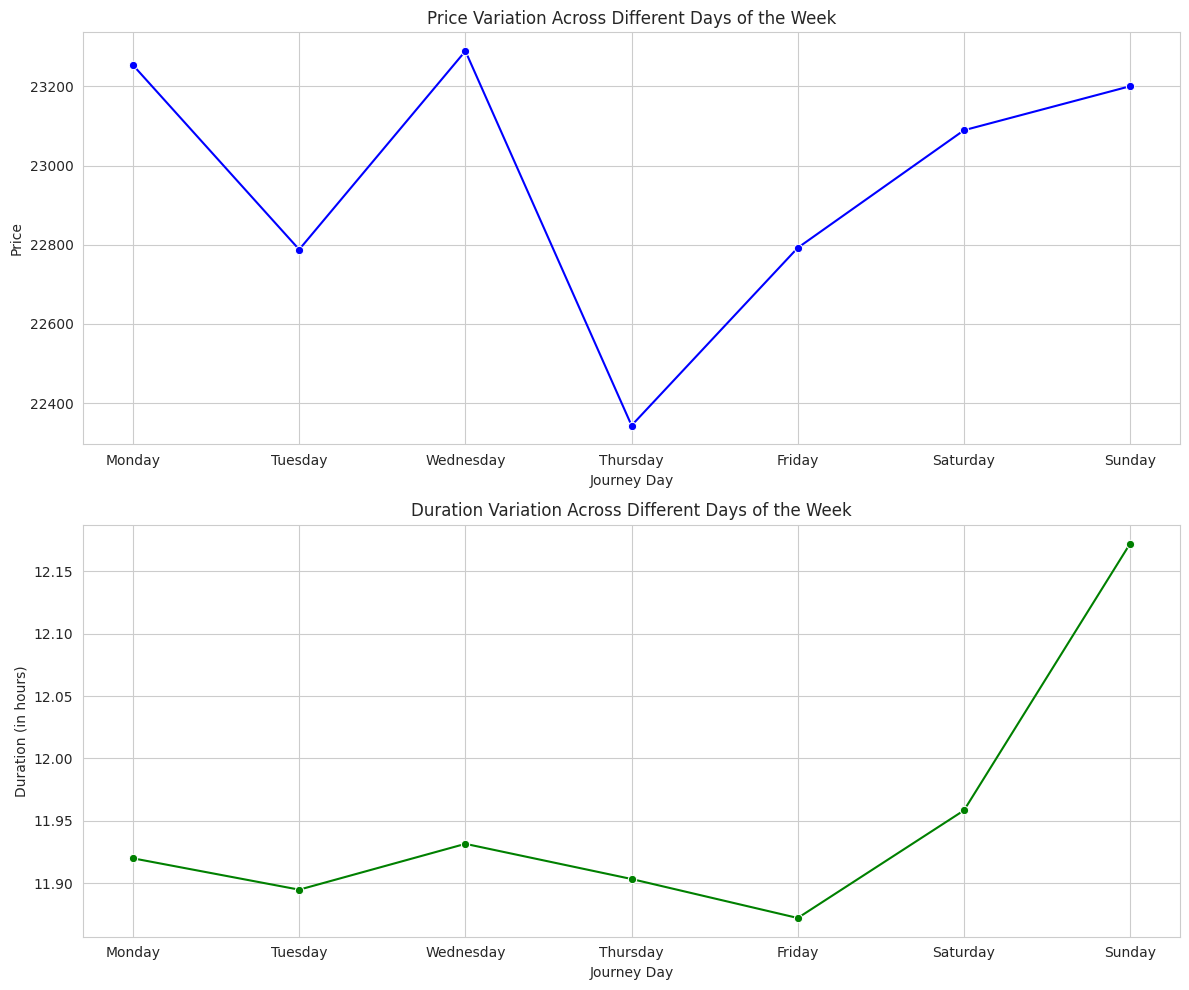

In [ ]:
# Create subplots for Price and Duration
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Plot Price vs Journey_day
sns.lineplot(data=df, x='Journey_day', y='Price', ax=axes[0], ci=None, marker='o', color='blue')
axes[0].set_title('Price Variation Across Different Days of the Week')
axes[0].set_xlabel('Journey Day')
axes[0].set_ylabel('Price')
axes[0].grid(True)

# Plot Duration_in_hrs vs Journey_day
sns.lineplot(data=df, x='Journey_day', y='Duration_in_hrs', ax=axes[1], ci=None, marker='o', color='green')
axes[1].set_title('Duration Variation Across Different Days of the Week')
axes[1].set_xlabel('Journey Day')
axes[1].set_ylabel('Duration (in hours)')
axes[1].grid(True)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

# Todo analysis
Analyze how 'Price' and 'Duration_in_hrs' vary across different 'Journey_day' (days of the week).

## Model Construction

In [ ]:
# We need to create a new copy of df
df_temp = df.copy()
df_temp = df_temp.drop('Flight_Code', axis=1)
df_temp.columns

Index(['Date of Journey', 'Total Stops', 'Price', 'Airline', 'Class', 'Source',
       'Destination', 'Days_left', 'Journey_day', 'Dep', 'Arr', 'Route',
       'Duration_in_hrs'],
      dtype='object')

### Data Preprocessing

In [ ]:
# Encode the ordinal variables Total Stops, Class, Journey_day, Dep, Arr
df_enc = df_temp.copy()
df_enc['Total Stops'] = df_enc['Total Stops'].replace({'non-stop': 0, '1-stop': 1, '2+-stop': 2}).astype(int)
df_enc['Class'] = df_enc['Class'].replace({'ECONOMY': 0, 'PREMIUMECONOMY': 1, 'BUSINESS': 2, 'FIRST': 3}).astype(int)
df_enc['Journey_day'] = df_enc["Journey_day"].map({'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6})
df_enc['Dep'] = df_enc['Dep'].map({'Early Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late Night': 5})
df_enc['Arr'] = df_enc['Arr'].map({'Early Morning': 0, 'Morning': 1, 'Afternoon': 2, 'Evening': 3, 'Night': 4, 'Late Night': 5})

# Create dummy variables for Airline, Source, Destination with 0/1 encoding
cols = ['Airline', 'Source', 'Destination']
dummies = pd.get_dummies(df_enc[cols], drop_first=True, dtype='uint8')
df_enc = pd.concat([df_enc, dummies], axis=1)

df_enc.drop(['Date of Journey', 'Airline', 'Source', 'Destination', 'Route'], axis=1, inplace=True)

In [ ]:
df_enc.columns

Index(['Total Stops', 'Price', 'Class', 'Days_left', 'Journey_day', 'Dep',
       'Arr', 'Duration_in_hrs', 'Airline_AirAsia ', 'Airline_AkasaAir ',
       'Airline_AllianceAir ', 'Airline_GO FIRST ', 'Airline_Indigo ',
       'Airline_SpiceJet ', 'Airline_StarAir ', 'Airline_Vistara ',
       'Source_Bangalore', 'Source_Chennai', 'Source_Delhi',
       'Source_Hyderabad', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Bangalore', 'Destination_Chennai', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_Mumbai'],
      dtype='object')

In [ ]:
df_enc.dtypes

Total Stops                int64
Price                      int64
Class                      int64
Days_left                  int64
Journey_day                int64
Dep                        int64
Arr                        int64
Duration_in_hrs          float64
Airline_AirAsia            uint8
Airline_AkasaAir           uint8
Airline_AllianceAir        uint8
Airline_GO FIRST           uint8
Airline_Indigo             uint8
Airline_SpiceJet           uint8
Airline_StarAir            uint8
Airline_Vistara            uint8
Source_Bangalore           uint8
Source_Chennai             uint8
Source_Delhi               uint8
Source_Hyderabad           uint8
Source_Kolkata             uint8
Source_Mumbai              uint8
Destination_Bangalore      uint8
Destination_Chennai        uint8
Destination_Delhi          uint8
Destination_Hyderabad      uint8
Destination_Kolkata        uint8
Destination_Mumbai         uint8
dtype: object

In [ ]:
df_enc.head(100)

,Total Stops,Price,Class,Days_left,Journey_day,Dep,Arr,Duration_in_hrs,Airline_AirAsia,Airline_AkasaAir,...,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,5335,0,1,0,4,5,2.083333,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,5899,0,1,0,5,0,2.333333,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,5801,0,1,0,5,0,2.166667,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,5794,0,1,0,3,4,2.083333,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,5955,0,1,0,4,5,2.166667,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,12360,0,1,0,1,3,10.916667,0,0,...,1,0,0,0,0,0,0,0,0,1
96,1,11205,0,1,0,3,0,7.250000,0,0,...,1,0,0,0,0,0,0,0,0,1
97,1,12286,0,1,0,3,3,24.500000,0,0,...,1,0,0,0,0,0,0,0,0,1
98,0,11730,0,1,0,2,3,2.083333,0,0,...,1,0,0,0,0,0,0,0,0,1


### Splitting Data

In [ ]:
X = df_enc.drop('Price', axis=1)  # features
y = df_enc['Price']  # target variable

# Split the data into training and test sets
# This example uses 80% of the data for training and 20% for testing, which is a common split.
# The random_state parameter ensures that the splits are reproducible.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df_enc.head()

,Total Stops,Price,Class,Days_left,Journey_day,Dep,Arr,Duration_in_hrs,Airline_AirAsia,Airline_AkasaAir,...,Source_Delhi,Source_Hyderabad,Source_Kolkata,Source_Mumbai,Destination_Bangalore,Destination_Chennai,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_Mumbai
0,0,5335,0,1,0,4,5,2.083333,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,5899,0,1,0,5,0,2.333333,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,5801,0,1,0,5,0,2.166667,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,5794,0,1,0,3,4,2.083333,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,5955,0,1,0,4,5,2.166667,0,0,...,1,0,0,0,0,0,0,0,0,1


### Linear Regression

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_pred = linear.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Linear Regression:
Mean Absolute Error (MAE): 6799.23
Mean Squared Error (MSE): 94537579.95
R-squared (R2) Score: 0.77


### Ridge/Lasso Regression

In [ ]:
lasso = Lasso(alpha=1.0)  # You can adjust the alpha value as needed
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print("Lasso Regression:")
print(f"Mean Absolute Error (MAE): {mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): {mse_lasso:.2f}")
print(f"R-squared (R2) Score: {r2_lasso:.2f}")

Lasso Regression:
Mean Absolute Error (MAE): 6796.84
Mean Squared Error (MSE): 94538879.84
R-squared (R2) Score: 0.77


In [ ]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print("Ridge Regression:")
print(f"Mean Absolute Error (MAE): {mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared (R2) Score: {r2_ridge:.2f}")

Ridge Regression:
Mean Absolute Error (MAE): 6799.19
Mean Squared Error (MSE): 94537505.79
R-squared (R2) Score: 0.77


### KNN

In [ ]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"R-squared (R2) Score: {r2_knn:.2f}")

KNN:
Mean Absolute Error (MAE): 4900.12
Mean Squared Error (MSE): 64923327.14
R-squared (R2) Score: 0.85


### Decision Tree

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree:")
print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"R-squared (R2) Score: {r2_dt:.2f}")

Decision Tree:
Mean Absolute Error (MAE): 2503.43
Mean Squared Error (MSE): 33243606.52
R-squared (R2) Score: 0.92


### Random Forest

In [ ]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")

Random Forest:
Mean Absolute Error (MAE): 2088.52
Mean Squared Error (MSE): 17912771.63
R-squared (R2) Score: 0.96


### Model Evaluation

Random Forest model has the lowest MAE and MSE, and the highest R-squared value of 0.96, which means it performed the best out of all the models presented. It is followed by the Decision Tree model, which also has relatively low MAE and MSE, and a high R-squared value of 0.92.

In summary, the Random Forest model is the best model among those tested.

In [ ]:
y_pred = random_forest.predict(X_test)
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
comparison_df['Difference'] = comparison_df['Actual Price'] - comparison_df['Predicted Price']
comparison_df.tail(20)

,Actual Price,Predicted Price,Difference
117230,78957,82860.220000,-3903.220000
219902,9053,9760.850000,-707.850000
361465,45345,45345.000000,0.000000
235305,8388,8185.400000,202.600000
152639,11571,11571.000000,0.000000
164232,5659,11701.560000,-6042.560000
296141,9047,10984.327833,-1937.327833
166231,84974,73163.550000,11810.450000
53551,10198,13851.770000,-3653.770000
24431,6965,8408.310000,-1443.310000


As we can see, the difference is very very small as we approach to the end of the model.

In [ ]:
y_pred = model.predict(X_test)
comparison_df = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
comparison_df['Difference'] = comparison_df['Actual Price'] - comparison_df['Predicted Price']
print(comparison_df.head())  # Shows the first few entries

NameError: ignored

## Predictions on New Data

In [ ]:
# Use the chosen model to make predictions on new, unseen data.
# If the new data is in a CSV file, repeat the preprocessing steps before making predictions

## Model Deployment (Optional)

In [ ]:
# Deploy the model for real-time predictions if required.
# This might involve converting the model into a format suitable for integration into production environments.